In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
%matplotlib inline
import seaborn as sns

In [2]:
# Read in and preview 'cleaned_data.csv'
tweets = pd.read_csv('cleaned_data.csv')
tweets = tweets.iloc[:, [0, 1, 4]]
tweets.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...


In [3]:
# Look at tesla_tweets data types

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             113741 non-null  int64 
 1   date           113741 non-null  object
 2   cleaned_tweet  109112 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [4]:
# Convert date_time column into datetime stamp

tweets.date = pd.to_datetime(tweets.date)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             113741 non-null  int64         
 1   date           113741 non-null  datetime64[ns]
 2   cleaned_tweet  109112 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [5]:
# Check for null values

tweets.isnull().sum()

id                  0
date                0
cleaned_tweet    4629
dtype: int64

In [6]:
# Drop null values

tweets = tweets.dropna()

### 1. Calculate Sentiment Score with TextBlob

In [7]:
# Use TextBlob to get sentiment scores

tweets['sentiment'] = tweets.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets.head()

,id,date,cleaned_tweet,sentiment
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...,0.15
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...,0.20
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...,0.75


In [8]:
# Preview how sentiment scores differ on different tweets

pd.options.display.max_colwidth = 300
random_subset = tweets.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date'])
random_subset.rename(columns={'tweet':'Original Tweet'})
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 'cleaned_tweet': 'Cleaned Tweet', 'sentiment':'TextBlob Sentiment'})
random_subset.head(10)

,Cleaned Tweet,TextBlob Sentiment
83747,sgfreport lotta car ny lotta car birmingham end bnsf start richmond correspondant report never see many car,0.500000
109839,close friday reaffirms view oversupply inventory hold hfs portfolio trading desk continue see active bm fund buying bolster delivery earnings catalyst,-0.133333
61943,aapl amzn btc eth fb goog msft spy cnbc foxbusiness business money entrepreneur trading invest investment stock stockmarket forex crypto cryptocurrency bitcoin ethereum coinbase robinhood,0.000000
64506,value invest company notable hedge fund manager bill ackman recommend principle look lens principle assessment principle business must simple predictable,0.100000
42314,stars,0.000000
97402,elonmusk news electric car sale double world big ev market,0.000000
97955,computer today hardware dual system third one confirm neural network behave properly,0.000000
79240,ilikes think short bad short get cheap theranos enron get expose,-0.075000
32378,jazziimania peak price rona share dip way share mid march time get buy share ride gain per share expensive right,-0.071429
75863,manage money en bwpfinance june own share pop sell absolutely idea,0.400000


In [9]:
tweets.shape

(109112, 4)

### 2. Frequency Analysis

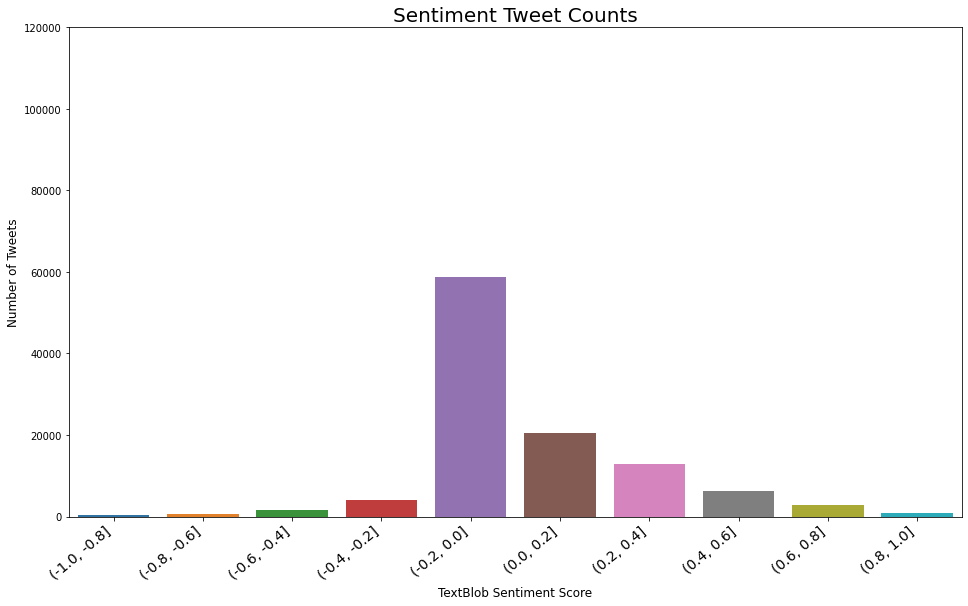

In [10]:
# View count of tweets for binned sentiment

bins = [-1.0, -0.8, -0.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets['binned'] = pd.cut(tweets['sentiment'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets['binned'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('TextBlob Sentiment Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title("Sentiment Tweet Counts", fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 3. Calculate Daily Sentiment

In [11]:
daily_sentiment = tweets[['date', 'sentiment']]
daily_sentiment.head()

,date,sentiment
0,2020-01-02,0.15
1,2020-01-02,-0.20
2,2020-01-02,0.20
3,2020-01-02,0.00
4,2020-01-02,0.75


In [12]:
daily_sentiment = daily_sentiment.resample('D', on='date').mean()
daily_sentiment.head()

,sentiment
date,
2020-01-01,0.099938
2020-01-02,0.111398
2020-01-03,0.073760
2020-01-04,0.083606
2020-01-05,0.086658


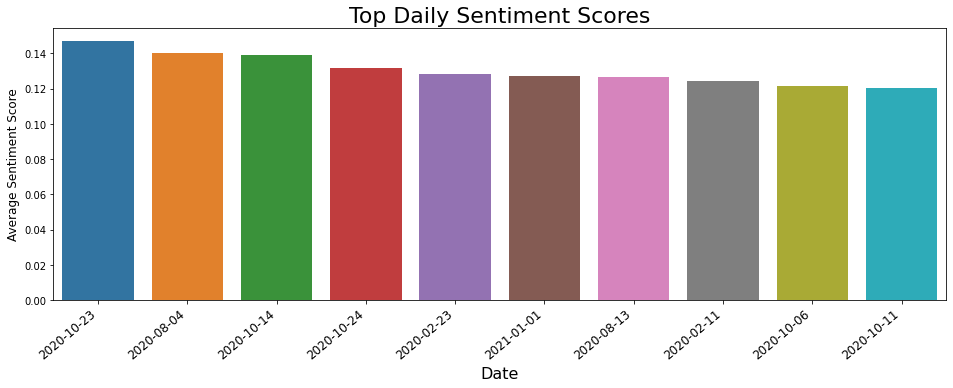

In [13]:
# Find the days with the highest sentiment_2

freq_df = daily_sentiment.nlargest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Top Daily Sentiment Scores', fontsize=22)
plt.show()

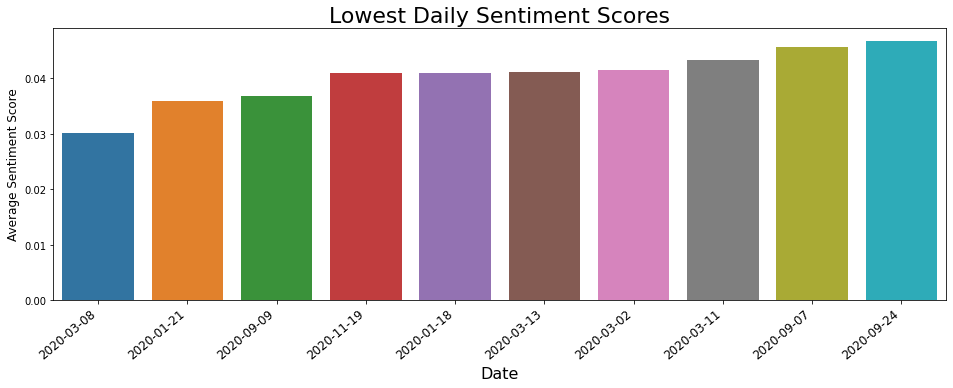

In [14]:
freq_df = daily_sentiment.nsmallest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Lowest Daily Sentiment Scores', fontsize=22)

plt.show()

### 4. Remove Tweets with Sentiment Scores of 0

In [15]:
remove_s1_0 = tweets.copy()
remove_s1_0.head()

,id,date,cleaned_tweet,sentiment,binned
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15,"(0.0, 0.2]"
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20,"(-0.4, -0.2]"
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20,"(0.0, 0.2]"
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00,"(-0.2, 0.0]"
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75,"(0.6, 0.8]"


In [16]:
# Check how many tweets had sentiment scores of 0
print('There are ' + str((remove_s1_0.sentiment == 0).sum()) + ' tweets with a Sentiment Score of 0')

There are 48917 tweets with a Sentiment Score of 0


In [17]:
# Remove tweets with 0 for sentiment_2 scores
remove_0 = tweets.copy()
remove_0 = remove_0.rename(columns={'sentiment':'s_no_0'})
remove_0 = remove_0[remove_0.s_no_0 != 0]
(remove_0.s_no_0 == 0).sum()

0

In [18]:
remove_0 = remove_0.groupby(['date'], as_index = False).mean()

In [19]:
# Check that there are no null values

remove_0.isnull().sum()

date      0
id        0
s_no_0    0
dtype: int64

In [20]:
# Add updated columns back to early_tweets dataframe
daily_sentiment['sentiment_final'] = remove_0.s_no_0.values
daily_sentiment.index.names = ['Date']
daily_sentiment.head()

,sentiment,sentiment_final
Date,,
2020-01-01,0.099938,0.154961
2020-01-02,0.111398,0.161528
2020-01-03,0.073760,0.128297
2020-01-04,0.083606,0.144796
2020-01-05,0.086658,0.132267


### 5. Save Sentiment Analysis Results

In [21]:
daily_sentiment.to_csv('daily_sentiment_scores.csv')